# Deep leaning for computer vision: Preparation

In this first homework, you will familiarize yourself with the basics of differentiable programming and the PyTorch framework.

In the following, we provide some code blocks that are already running, along with explanations. You are asked to complete the code blocks in which the `# your code` comment is present. Sometimes, you will also have to motivate why you programmed certain things or guide us quickly through the results you obtained. If this is required you will see the following instruction:

> your discussion

Please note that you will **not** have to handle in any sort of written report by the end of the assignment. We do however expect you to submit the notebook **with the solutions** to the exercises.

## 0. Imports

Our first step is very easy: we simply import the required libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## 1. Tensors and basic operations

Tensors are one of the main ingredients when it comes to modern deep learning frameworks. Almost all deep learning computations can be expressed as tensor operations which make computation fast and efficient, especially on graphics processing units (GPUs). We will now see how to manipulate tensors within the PyTorch framework.

There are many valid definitions for tensors, but to keep it simple you can see them as multi-dimensional arrays. Zero-dimensional tensors are scalars, one-dimensional tensors are vectors, two-dimensional tensors are matrices, etc.

In PyTorch, a tensor is an instance of the class `torch.Tensor`. PyTorch tensors are **very** similar to NumPy arrays.
Almost any operations you could imagine can be performed on tensors (see [API](https://pytorch.org/docs/stable/tensors.html)).

### 1.1 Tensors

There are many ways to [create tensors](https://pytorch.org/docs/stable/tensors.html#torch.Tensor), for instance:

In [ ]:
# we can create a tensor from lists
t1 = torch.tensor([[1, 2], [-7, 9]])
print(t1)

# or from numpy arrays
t2 = torch.from_numpy(np.array([[1., 8.], [0., 3.]]))
print(t2)

# or we can create a 2x3x4 tensor filled with zeros
t3 = torch.zeros(2, 3, 4)
print(t3)

As an array may contain different types of data (e.g. float, int, boolean), so can a tensor. Let's check what types of data are in `t1`, `t2` and `t3`:

In [ ]:
print(t1.dtype, t2.dtype, t3.dtype, sep='\n')

As expected, PyTorch uses an integer data type to store integer values and a floating-point data type to store real values. However, unlike NumPy, PyTorch uses a **single-precision** floating-point data type (`float32`) by default.

You can convert tensors from one type to another:

In [ ]:
print(t1.float(), t2.long(), t3.double(), sep='\n')

Another important property of a tensor is its shape. You can use the `.shape` property or `.size()` method to check the dimensions of a tensor. Both return a `torch.Size` object that can be manipulated with its own operations. Most of the time, you will just use `torch.Size` objects as tuples or lists (e.g. to check the size of a tensor along one of its dimension).

In [ ]:
# the full shape
print(t1.shape)

# the length of the tensor along its first dimension
print(t2.shape[0])

# the shape of the two last dimensions
print(t3.shape[-2:])

### 1.2 Operations

We now consider simple tensor operations on 1D (vectors) and 2D (matrices) tensors. Lets instantiate two vectors with 5 elements and two matrices of respectively 3x5 and 5x5 elements.

In [ ]:
v1 = torch.ones(5)
print(v1)

v2 = torch.randn(5)  # standard gaussian
print(v2)

m1 = torch.rand(3, 5)  # [0, 1) uniform
print(m1)

m2 = torch.eye(5)  # identity matrix
print(m2)

The most basic operations are the addition, subtraction, multiplication and division. As in NumPy, but unlike MATLAB, the symbols `+, -, *, /` all perform **element-wise** operations.

In [ ]:
# add v1 and v2
v_sum = v1 + v2
print(v_sum)

# subtract v1 from v2
v_sub = v1 - v2
print(v_sub)

# multiply the elements of v1 and v2
v_mul = v1 * v2
print(v_mul)

# divide the elements of v1 by v2
v_div = v1 / v2
print(v_div)

When trying to perform an element-wise operation between tensors of different shapes, the tensors are [broadcast](https://numpy.org/doc/stable/user/basics.broadcasting.html) together, if possible. Notably, this allows to add or multiply tensors by scalars.

In [ ]:
# add a scalar
print(v1 + 1)

# multiply by scalar
print(v2 * 2)

# broadcast substraction between vector and matrix
print(v2 - m1)

Another basic operation with tensors is the inner product, denoted by the symbol `@`.

In [ ]:
# scalar product between v1 and v2
print(v1 @ v2)

# matrix-vector product between m1 and v2
print(m1 @ v2)

# matrix-matrix product between m1 and m2
print(m1 @ m2)

#### Aggregation

Common operations are to aggregate the values of a tensor along a dimension into a single value. For instance, computing the sum of the rows of a matrix . A lot of aggregation methods such as `.sum`, `.prod`, `.mean`, `.max`, ... are available.

In [ ]:
# sum of rows of m1
print(m1.sum(dim=1))

# mean of columns of m2
print(m2.mean(dim=0))

# prod of the elements of v2
print(v2.prod())

#### Indexing

Sometimes you would like to extract a sub-tensor from the tensor. This operation is called *slicing*.

In [ ]:
# extract elements 0 (included) to 2 (not included)
print(v1[0:2])

# extract all elements but the last
print(v2[:-1])

You may also extract a subset of the elements by passing a list of indices.

In [ ]:
# extract the first, fourth and fifth elements
v2[[0, 3, 4]]

Matrices can also be sliced/indexed.

In [ ]:
m1[:4, 2:-1]

#### Squeeze and Unsqueeze

Squeezing removes dimensions of size 1 from tensors. Unsqueezing adds a dimension of size 1.

In [ ]:
# before unsqueeze
print(m1.shape)

# after unsqueeze
m1 = m1.unsqueeze(1)
print(m1.shape)

# after squeeze
m1 = m1.squeeze(1)
print(m1.shape)

#### View

Sometimes, tensors don't have the correct shape. For example, you might want to process 3x32x32 images as vectors of 3072 elements. The `.view` method returns a new tensor with the same data, but of a different shape.

In [ ]:
images = torch.rand(10, 3, 32, 32)
print(images.shape)

images_as_vectors = images.view(10, -1)
print(images_as_vectors.shape)

However, both tensors share the same underlying data, meaning that modifying one in-place will also modify the other.

In [ ]:
images[0, :] = torch.zeros_like(images[0])
images_as_vectors[0]

It should be noted that slicing, indexing and squeezing operations actually create views of the tensor instead of making copies of the data. For a complete list of view operations in `torch`, see the [documentation](https://pytorch.org/docs/stable/tensor_view.html).

#### Other primitives

A **lot** of useful primitives are available in `torch`. Notable examples are [exp](https://pytorch.org/docs/stable/generated/torch.exp.html), [log](https://pytorch.org/docs/stable/generated/torch.log.html), [sqrt](https://pytorch.org/docs/stable/generated/torch.sqrt.html), [ceil](https://pytorch.org/docs/stable/generated/torch.ceil.html), [clamp](https://pytorch.org/docs/stable/generated/torch.expand.html), [sort](https://pytorch.org/docs/stable/generated/torch.sort.html), [argmax](https://pytorch.org/docs/stable/generated/torch.argmax.html), [stack](https://pytorch.org/docs/stable/generated/torch.stack.html), [cat](https://pytorch.org/docs/stable/generated/torch.cat.html), [where](https://pytorch.org/docs/stable/generated/torch.where.html) and so on. Always take a look at the [documentation](https://pytorch.org/docs/stable/index.html) before implementing something. And don't forget: Google is your best friend!

### 1.3 Try it yourself!

Create a tensor `samples` with $10^{5}$ i.i.d. normally (mean 5 and standard deviation 2) distributed values.

In [ ]:
samples = # your code

Extract the first 42 elements of `samples`.

In [ ]:
# your code

Extract the last 666 elements of `samples`.

In [ ]:
# your code

Extract all the elements of `samples` that have an odd index.

In [ ]:
# your code

Create a view of shape 10x1000x10 of `samples`.

In [ ]:
# your code

Compute the mean of `samples` using a `for` loop:

In [ ]:
%%timeit

# your code

Compute the mean and standard deviation of `samples` with the appropriate PyTorch operators:

In [ ]:
%%timeit

# your code

What do you observe when you compare the running time of the two code snippets?

> your discussion

Compute the absolute-value ($L_1$) and Euclidean ($L_2$) norms of `samples`, without loops.

In [ ]:
# your code

Extract the first and last 13 elements of `samples` as two distinct vectors and compute their [outer product](https://en.wikipedia.org/wiki/Outer_product) matrix, without loops.

In [ ]:
# your code

Extract the diagonal of this matrix.

In [ ]:
# your code

Trace the curve defined by the coordinates

$$x(t) = 16 \sin(t)^3$$

$$y(t) = 13 \cos(t) - 5 \cos(2t) - 2 \cos(3t) - \cos(4t)$$

for $t \in [0, 2\pi[$.

You can use `np.pi` for the value of $\pi$ and the `matplotlib` package to plot the curve.

In [ ]:
# your code

## Image Manipulation

In this course we will use images to train deep learning models. We thus need to learn how to manipulate images and display in python, and pytorch.
In torch, images are tensors, that is, arrays of numbers representing the values of each pixel of the image. For example, the shape of the tensor representing a gray-scale 256x256 pixel image is: (1x256x256). Colored images code colors using 3 channels for red, green and blue colors, thus the tensor representing a colored image of the same size would have a shape of (3x256x256).


### Reading images
Reading images can be done using the `PIL` library or using the `torchvision` library, we will see both ways.

In [18]:
# import PIL and torch vision
from PIL import Image
import torchvision

# Open image with PIL
img1_numpy = np.array(Image.open('corgi.png'))
# The image is opened as a numpy array, we transform to tensor:
img1 = torch.from_numpy(img1_numpy)
print(img1.dtype, img1.shape)

# Open image with torchvision
img2 = torchvision.io.read_image('corgi.png')
print(img2.dtype, img2.shape)

torch.uint8 torch.Size([256, 256, 3])
torch.uint8 torch.Size([3, 256, 256])


We have to be carefull with the shape of the tensor, in pytorch, the color channels must be the first dimension, but this is not the case in numpy.

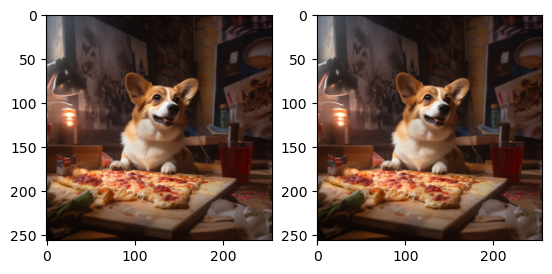

In [19]:
# display image
f, ax = plt.subplots(1,2)

ax[0].imshow(img1)

# we transpose before display because matplotlib expects numpy format (color channels last)
img2_t = np.transpose(img2, (1, 2, 0))
ax[1].imshow(img2_t)

Transformations that are possible on images using pytorch are presented here: https://pytorch.org/vision/stable/transforms.html#functional-transforms

Use the documentation to transform one of the images by:
- rotating the image 90°
- invert the colors

Then display the 2 images next to each other using matplotlib

In [ ]:
# your code

## Dataloaders

One important concept is PyTorch's dataloaders. One of the core ingredients for successfully training deep learning models is data, lots of data.
As you can easily imagine, it is not possible to load datasets of millions of images into the memory of your machine.
To deal with this issue (and many more of them) we can use dataloaders, a data loading utility that allows us to deal with large datasets efficiently. In what follows, you are given your first example of dataloader which will use the popular CIFAR10 dataset.

In [21]:
from torchvision import datasets, transforms, utils
import torch.utils.data as data

In [22]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, transform=transform)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 170498071/170498071 [00:06<00:00, 25691564.49it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


Let's explain what we just did. Thanks to PyTorch's torchvision sub-library, we just downloaded the CIFAR10 dataset on our machine. The dataset was stored in the `./data` folder and comes in two different forms thanks to the use of the `train` flag: a version that can be used as training set, and a version that can be used as testing set. These two datasets are subclasses of torch's `data.Dataset` class. We will see later what this `data.Dataset` class consists in exactly. 

Torchvision also allows us to define a set of image transformations which we have defined at the beginning of this cell: in this case we would like to convert our images to tensors, see the [documentation](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) for an exact description of this transformation.

Now that we have defined which dataset we would like to use, and the form in which we would like to have our images, we can create our first data loader. Data loaders are objects over which you can iterate and that load, transform and return mini-batches of inputs/targets at each iteration.


In [23]:
trainloader = data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = data.DataLoader(testset, batch_size=4, shuffle=False)

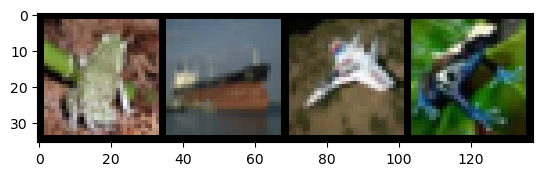

frog ship plane frog


In [24]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def show_images(img):
    plt.imshow(transforms.functional.to_pil_image(img))
    plt.show()

images, labels = next(iter(trainloader))
show_images(utils.make_grid(images))
print(*[classes[l] for l in labels])

The transforms module comes also in as very handy for performing other type of data transformations: here's an example which transforms the CIFAR10 images into gray scaled images. The transformations are similar to the ones we have used on our previous image loading example. Except, here, they are automatically applied when the user iterates on the dataloader.

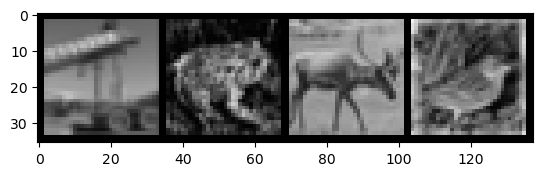

truck frog deer bird


In [26]:
transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
gray_scaled_trainset = datasets.CIFAR10(root='./data', train=True, transform=transform)
gray_scaled_trainloader = data.DataLoader(gray_scaled_trainset, batch_size=4, shuffle=True)

images, labels = next(iter(gray_scaled_trainloader))
show_images(utils.make_grid(images))
print(*[classes[l] for l in labels])

Now make a new dataloader that:
- rotate the images with a random angle
- changes the brightness or the image for a random value

Use the transformations described in the [documentation](https://pytorch.org/vision/stable/transforms.html#)

Display 4 images from this new loader.

In [28]:
# your code

## Feedback

We will now ask you a few questions to improve the content of this homework for next years.

<span style="color:blue">How long did you spend on this homework?</span>

<span style="color:blue">Did you learn something?</span>

<span style="color:blue">Do you now feel comfortable with writing simple mathematical operations (like you would do in matlab or with numpy) in PyTorch?</span>